# Loan Eligibility Prediction using Supervised Learning (Logistic Regression, Linear Regression, Naive Bayes, KNN, SVM, Gradient Descent)

In [1]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from scipy.stats import chisquare,chi2_contingency

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

from statsmodels.formula.api import ols   
from sklearn.linear_model import SGDClassifier

from sklearn.linear_model import LogisticRegression

from sklearn.naive_bayes import GaussianNB

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_curve,roc_auc_score

from sklearn import svm

In [2]:
data=pd.read_csv("C:/Users/Pavithra S/Downloads/Bank_Personal_Loan_Modelling-1.xlsx")
data.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [4]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


## Data Preprocessing:

In [5]:
#Analysing the columns we see that the experinece column the data is entered wrongly like -3,-2,-1 

data['Experience'].replace({-3:3,-2:2,-1:1},inplace=True)

#Replacing 0 experience
#From the data we see that the people with 0 exp is between age 24 and 30

exp_mean=data['Experience'].loc[(data['Age']>=24) & (data['Age']<=30) ].mean()
exp_std=data['Experience'].loc[(data['Age']>=24) & (data['Age']<=30) ].std()
exp_zero_count=data['Experience'].loc[data['Experience']==0].value_counts()


blank_exp=np.random.randint(exp_mean-exp_std,exp_mean+exp_std,size=exp_zero_count)

data['Experience'].loc[data['Experience']==0]=blank_exp

#Thus Experience column is preprocessed

<Axes: xlabel='Mortgage', ylabel='Density'>

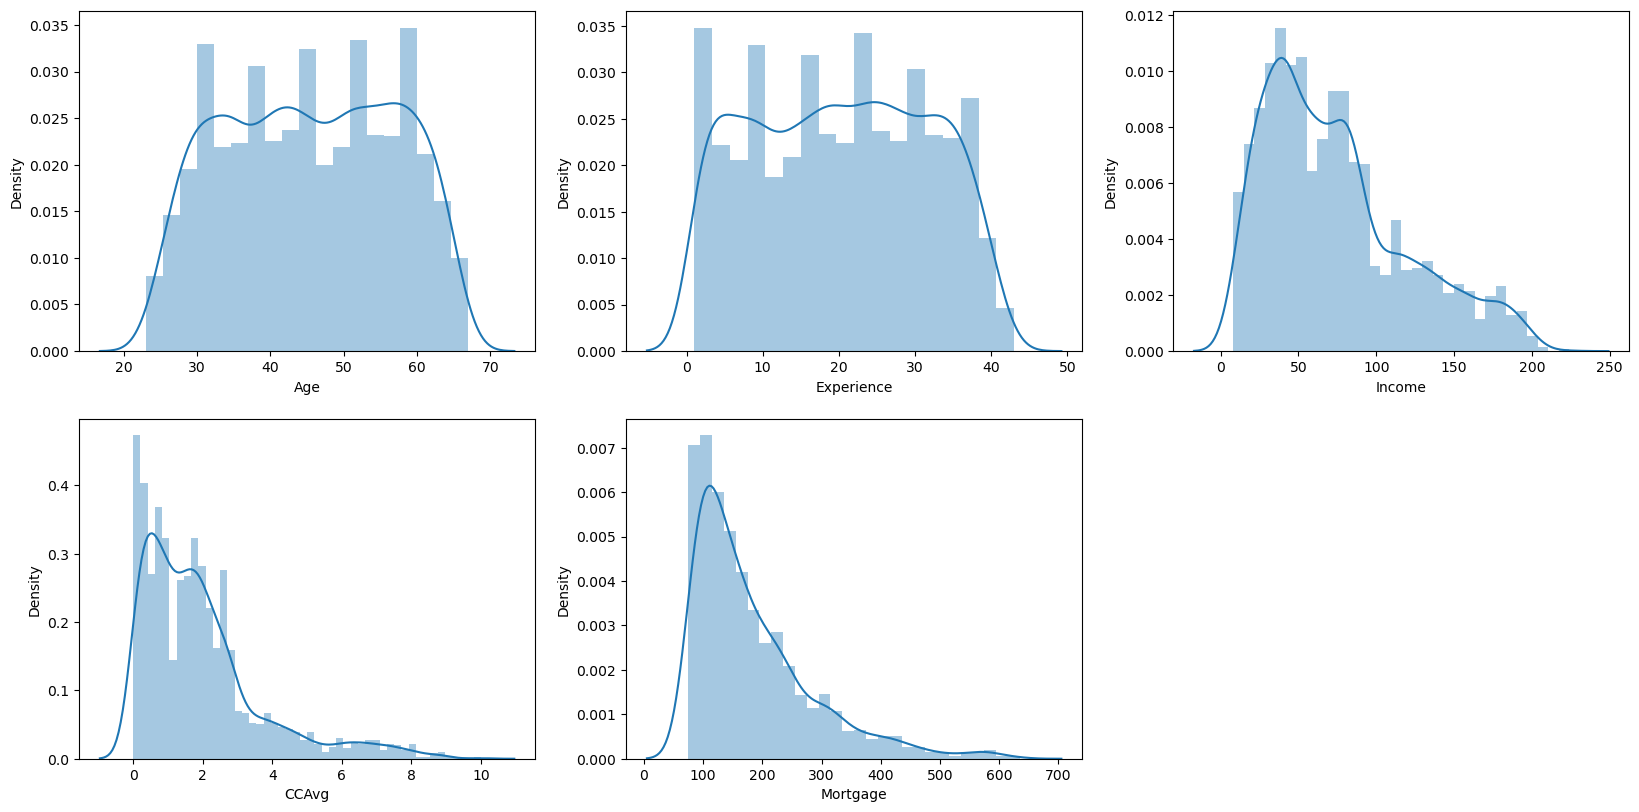

In [6]:
#Checking the normality of the columns

plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.distplot(data['Age'])
plt.subplot(3,3,2)
sns.distplot(data['Experience'])
plt.subplot(3,3,3)
sns.distplot(data['Income'])
plt.subplot(3,3,4)
sns.distplot(data['CCAvg'])
plt.subplot(3,3,5)
sns.distplot(data['Mortgage'].loc[data['Mortgage']!=0])

<Axes: xlabel='Personal Loan', ylabel='Mortgage'>

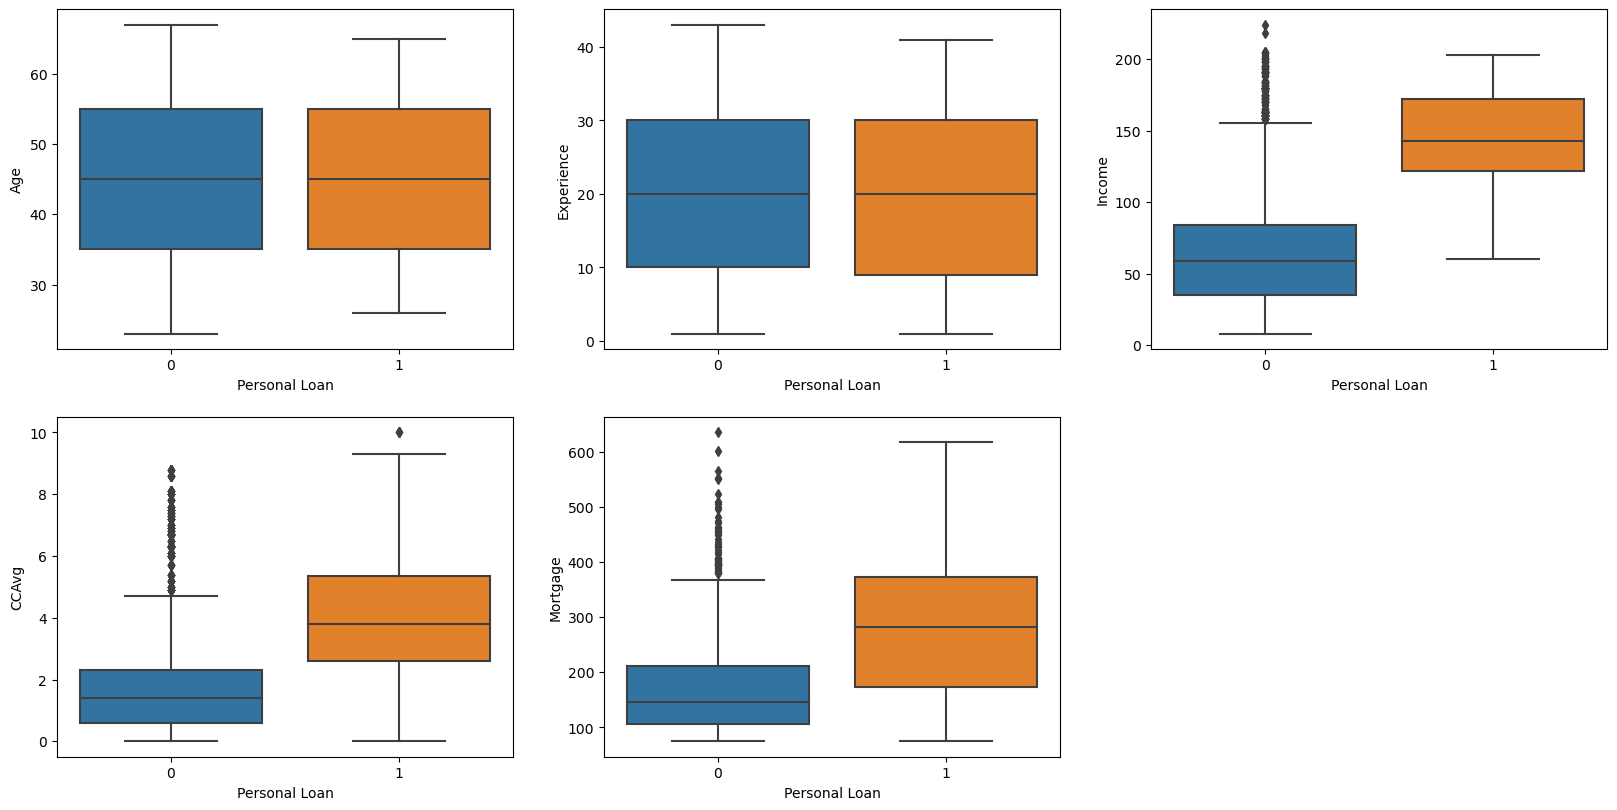

In [7]:
#Checking the outliers of the columns using boxplot

plt.figure(figsize=(20,15))
plt.subplot(3,3,1)
sns.boxplot(x='Personal Loan',y='Age',data=data)
plt.subplot(3,3,2)
sns.boxplot(x='Personal Loan',y='Experience',data=data)
plt.subplot(3,3,3)
sns.boxplot(x='Personal Loan',y='Income',data=data)
plt.subplot(3,3,4)
sns.boxplot(x='Personal Loan',y='CCAvg',data=data)
plt.subplot(3,3,5)
sns.boxplot(x='Personal Loan',y=data['Mortgage'].loc[data['Mortgage']!=0],data=data)

Thus, it is clear that CCAvg,Income and Mortgage column has outliers.

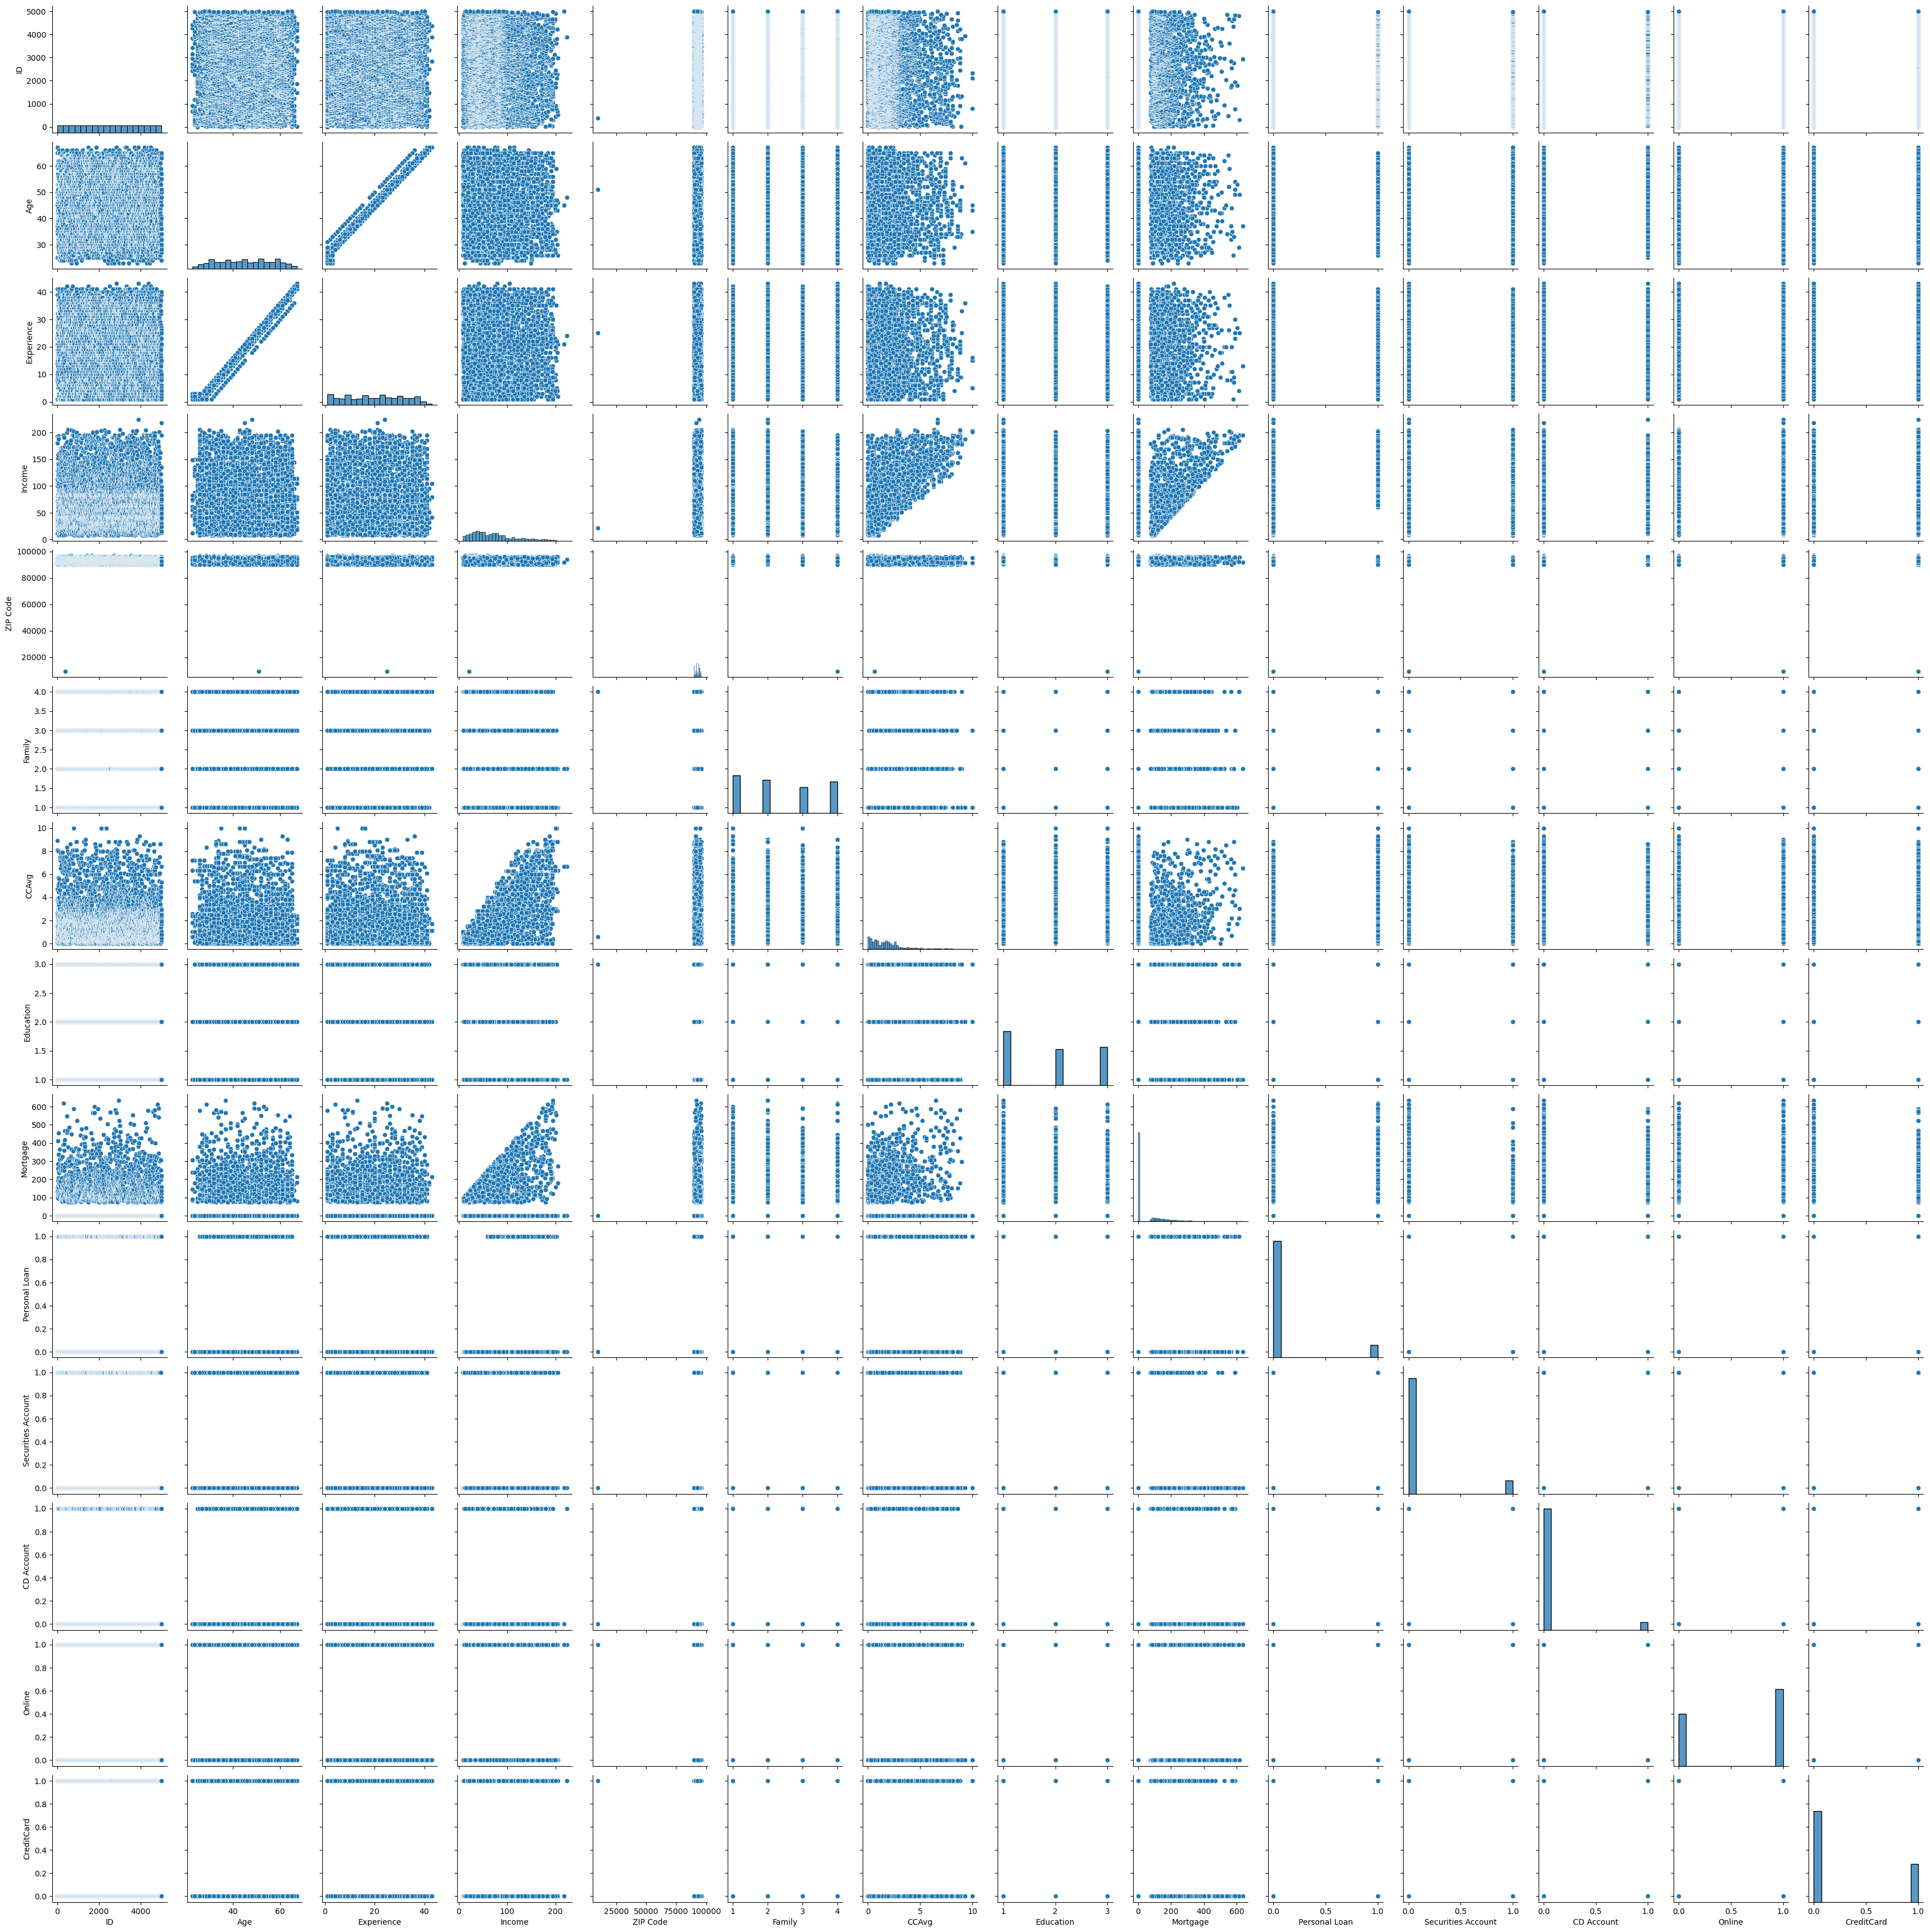

In [8]:
sns.pairplot(data)

<Axes: >

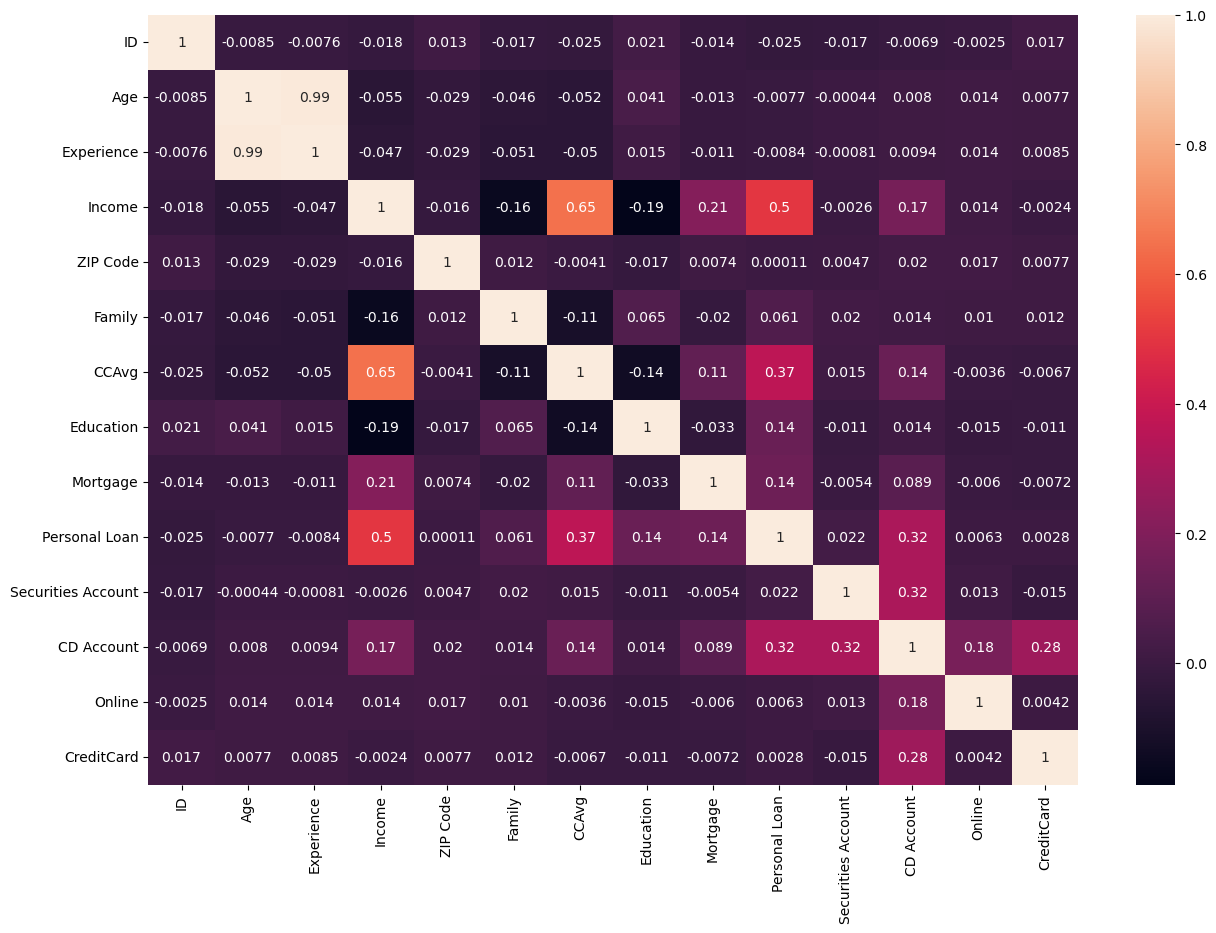

In [9]:
linear_corr=data.corr()
fig, ax = plt.subplots(figsize=(15,10)) 
sns.heatmap(linear_corr,annot=True,ax=ax)

Age and Experience are linearly correlated. Income and CCAvg are partially correlated.

<Axes: xlabel='ZIP Code', ylabel='count'>

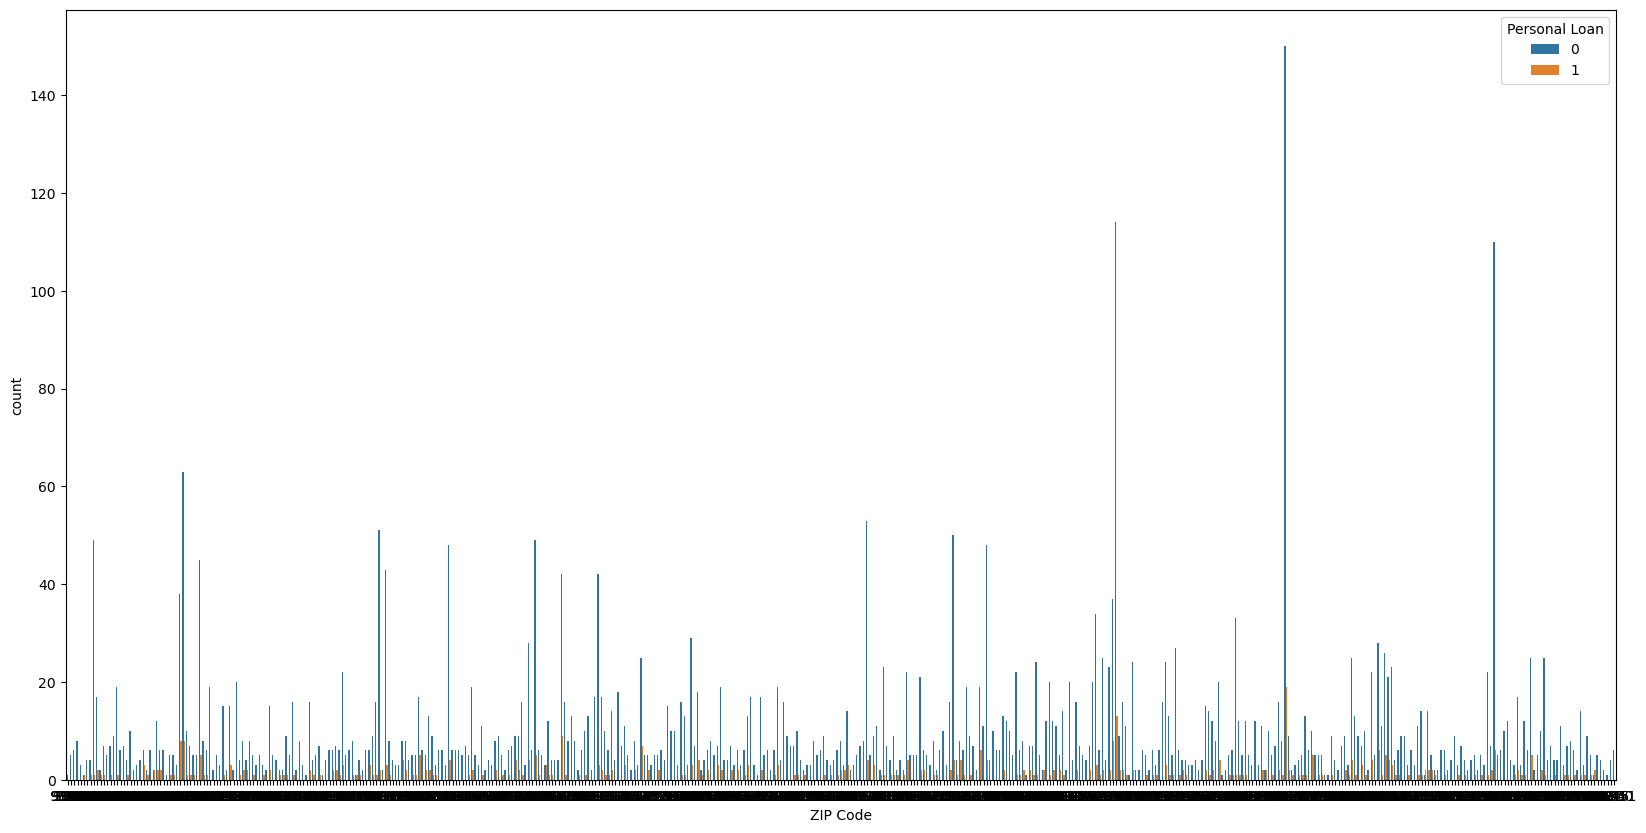

In [10]:
fig, ax = plt.subplots(figsize=(20,10)) 
sns.countplot(x='ZIP Code',hue='Personal Loan',data=data,ax=ax)

In [11]:
pd.crosstab(data['ZIP Code'],data['Personal Loan'])

Personal Loan,0,1
ZIP Code,,
9307,1,0
90005,5,0
90007,6,0
90009,8,0
90011,3,0
...,...,...
96091,4,0
96094,2,0
96145,1,0


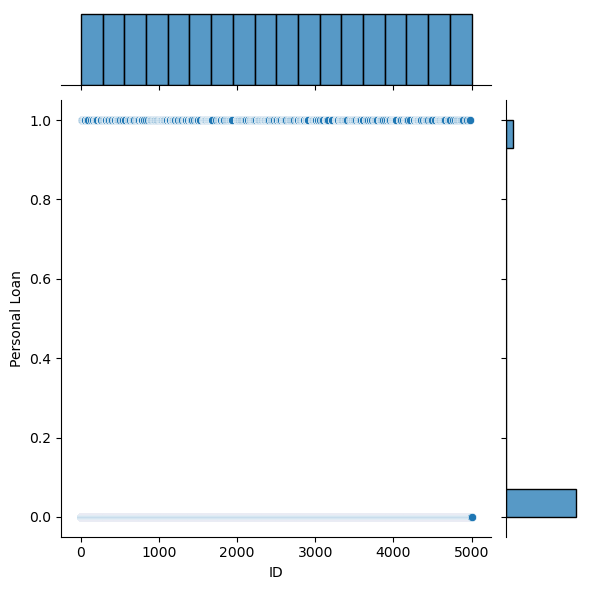

In [12]:
sns.jointplot(x='ID',y='Personal Loan',data=data)

In [13]:
drop_cols=['Experience','ID','ZIP Code']
data.drop(columns=drop_cols,inplace=True)
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,4,1.6,1,0,0,1,0,0,0
1,45,34,3,1.5,1,0,0,1,0,0,0
2,39,11,1,1.0,1,0,0,0,0,0,0
3,35,100,1,2.7,2,0,0,0,0,0,0
4,35,45,4,1.0,2,0,0,0,0,0,1


In [14]:
print(data[['Personal Loan','Family']].groupby(['Family']).mean())
print(data[['Personal Loan','Education']].groupby(['Education']).mean())
print(data[['Personal Loan','Securities Account']].groupby(['Securities Account']).mean())

        Personal Loan
Family               
1            0.072690
2            0.081790
3            0.131683
4            0.109656
           Personal Loan
Education               
1               0.044370
2               0.129722
3               0.136576
                    Personal Loan
Securities Account               
0                        0.093792
1                        0.114943


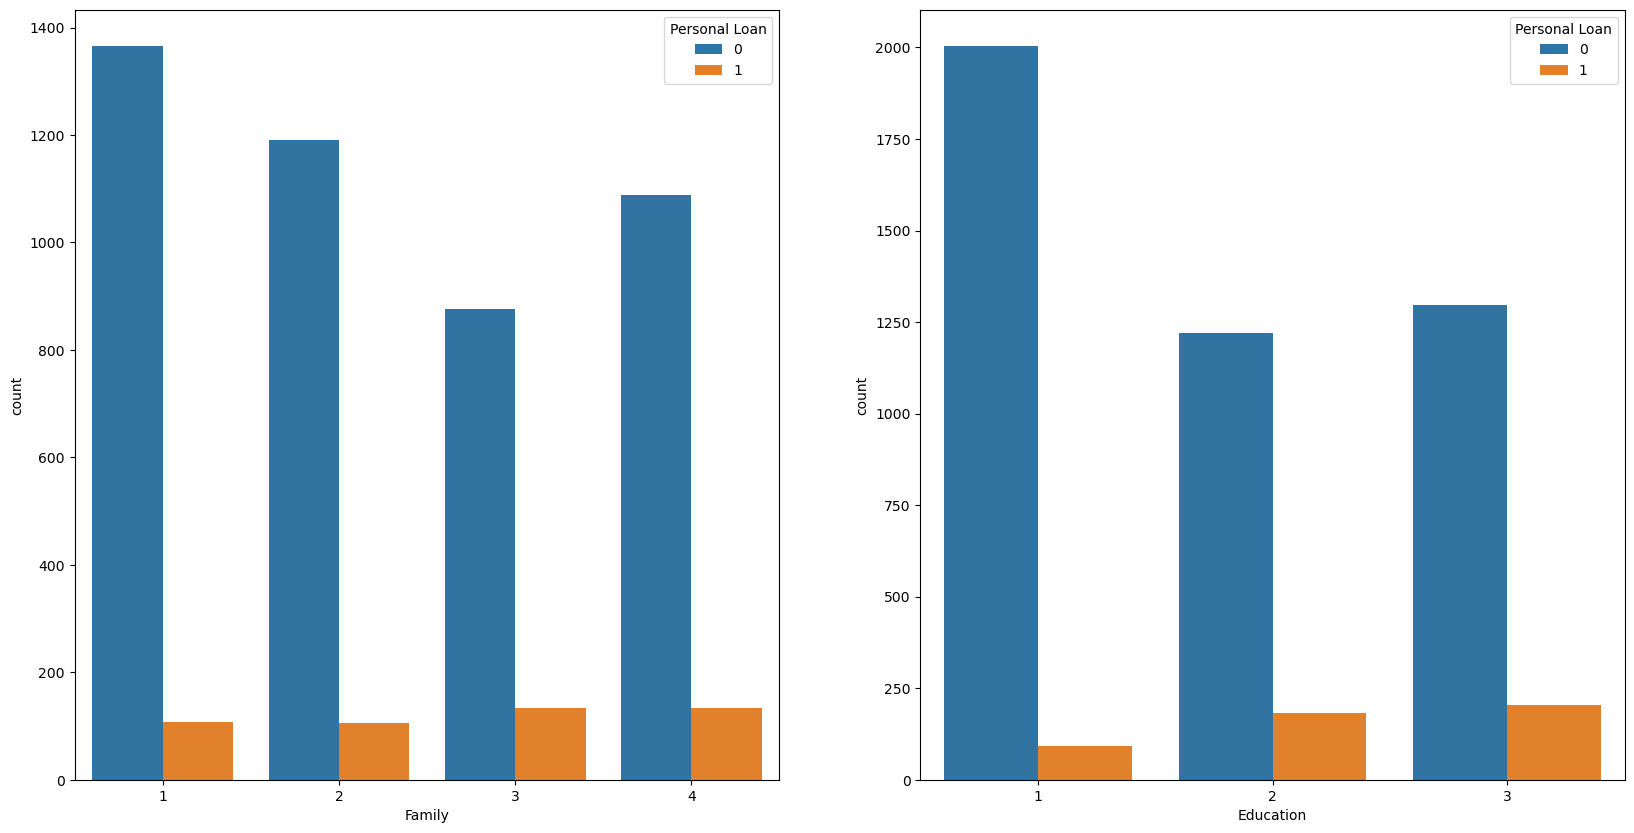

In [15]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.countplot(x='Family',hue='Personal Loan',data=data)
plt.subplot(1,2,2)
sns.countplot(x='Education',hue='Personal Loan',data=data)

#We see that if the family size is greater than 2, it makes people to apply loan
#So we can make a category column, Big_family - 0 means less than or equal to 2 ; 1 means greater than 2
data['Big_family']=data['Family'].replace({1:0,2:0,3:1,4:1})

#We also see that the people with more than 1 degree has same characteristics, so we can group em together,
data['Is_Educated']=data['Education'].replace({1:0,2:1,3:1})


#We see that most of people dont take Mortgage, So its better to convert wether Mortgage is taken or not,
data['IsMortgage']=data['Mortgage']
data[data['IsMortgage']!=0] = 1

#Thus we can drop Family,Education and Mortrage columns,
drop_cols=['Mortgage','Family','Education']
data.drop(columns=drop_cols,inplace=True)

<Axes: xlabel='CreditCard', ylabel='count'>

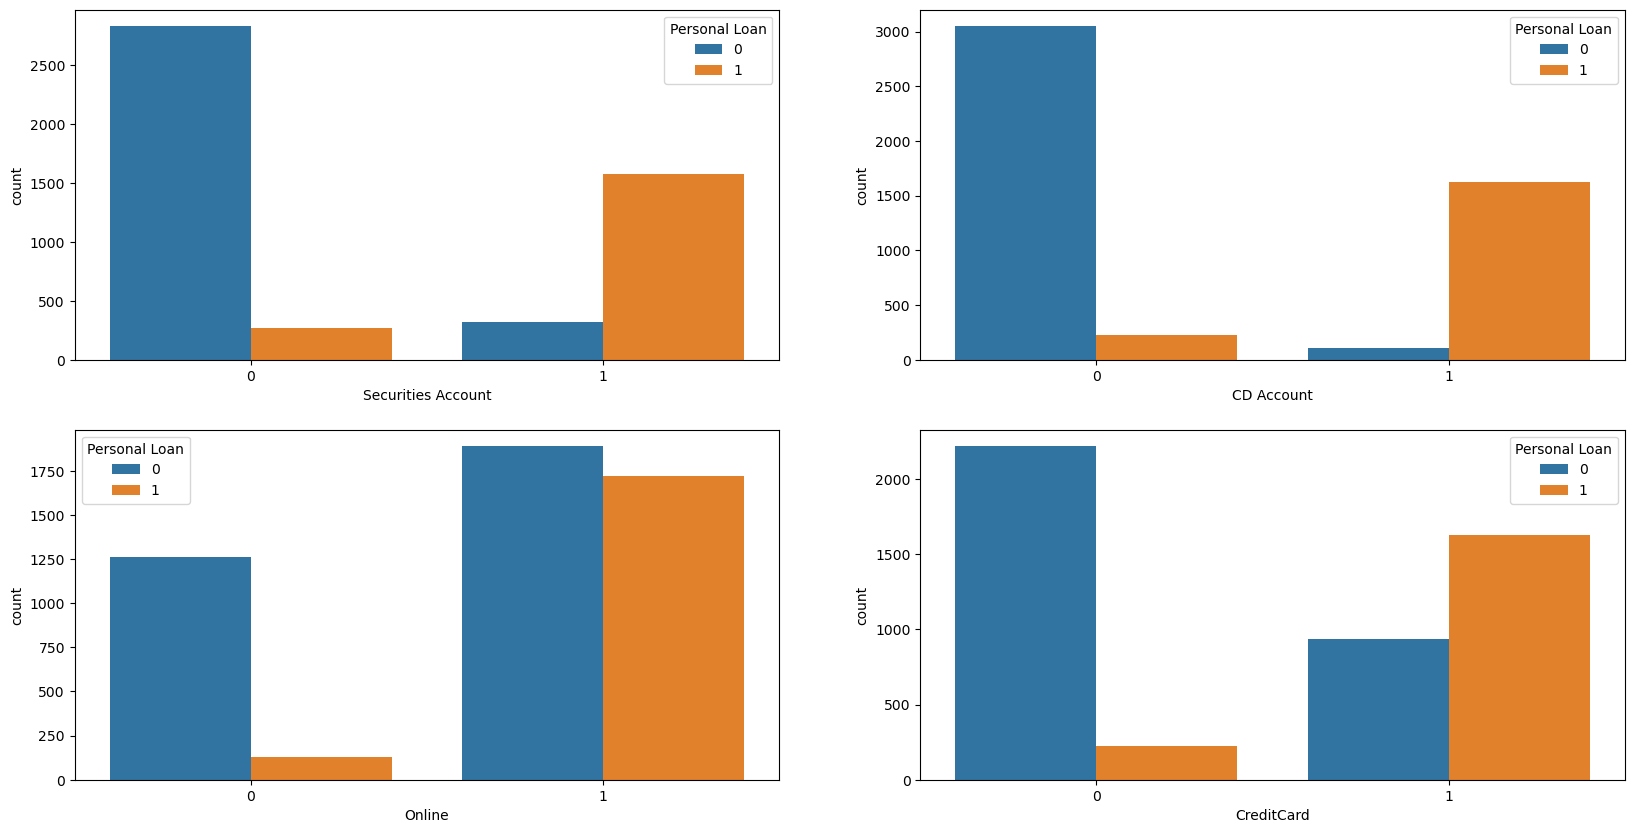

In [16]:
plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.countplot(x='Securities Account',hue='Personal Loan',data=data)
plt.subplot(2,2,2)
sns.countplot(x='CD Account',hue='Personal Loan',data=data)
plt.subplot(2,2,3)
sns.countplot(x='Online',hue='Personal Loan',data=data)
plt.subplot(2,2,4)
sns.countplot(x='CreditCard',hue='Personal Loan',data=data)

In [17]:
#Check dependency among the categorical variables

cont1=pd.crosstab(data['Securities Account'],data['CD Account'])
print(chi2_contingency(cont1))

cont2=pd.crosstab(data['CreditCard'],data['CD Account'])
print(chi2_contingency(cont2))

cont3=pd.crosstab(data['CreditCard'],data['Online'])
print(chi2_contingency(cont3))

Chi2ContingencyResult(statistic=3611.922391263455, pvalue=0.0, dof=1, expected_freq=array([[2029.845, 1069.155],
       [1245.155,  655.845]]))
Chi2ContingencyResult(statistic=2272.5029944222547, pvalue=0.0, dof=1, expected_freq=array([[1597.545,  841.455],
       [1677.455,  883.545]]))
Chi2ContingencyResult(statistic=368.3296163362811, pvalue=4.324048921504997e-82, dof=1, expected_freq=array([[ 678.5298, 1760.4702],
       [ 712.4702, 1848.5298]]))


In [18]:
data.rename(index=str,columns={"Personal Loan":"Personal_Loan" , "Securities Account":"Securities_Account" , "CD Account" : "CD_Account"},inplace=True)
data.head()

,Age,Income,CCAvg,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard,Big_family,Is_Educated,IsMortgage
0,25,49,1.6,0,1,0,0,0,1,0,0
1,45,34,1.5,0,1,0,0,0,1,0,0
2,39,11,1.0,0,0,0,0,0,0,0,0
3,35,100,2.7,0,0,0,0,0,0,1,0
4,35,45,1.0,0,0,0,0,1,1,1,0


In [19]:
#Splitting of Independent and Dependent variables

y=data['Personal_Loan']
X=data.drop(columns='Personal_Loan')

In [20]:
#Standardization of Data

def standardization(X_train,X_test):
    scaler=preprocessing.StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    return X_train,X_test

# Models:

In [21]:
#Linear regression method,

def linear_reg(X,y):
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)
    X_train,X_test=standardization(X_train,X_test)
    
    linear_reg=LinearRegression()
    linear_reg.fit(X_train,y_train)
    score=linear_reg.score(X_test,y_test)
    print("The linear model prediction is " + str(score*100) + "%")
    
    
    # make predictions
    expected = y_test
    predicted = linear_reg.predict(X_test).round()
    print("The confusion matrix is ")
    print(metrics.confusion_matrix(expected, predicted))
    
    roc=roc_auc_score(y_test, predicted)
    print("ROC value for linear model is "+ str(roc*100) + "%")
    
#OlS Linear Regression method

def linear_reg_ols(formula,data):
    model=ols(formula,data).fit()
    print(model.summary())
    
#Polynomial Regression model

def polynomial_reg(X,y):
    X_poly_train,X_poly_test,y_poly_train,y_poly_test=train_test_split(X,y,test_size=0.25,random_state=1)
    X_poly_train,X_poly_test=standardization(X_poly_train,X_poly_test)
    
    poly = PolynomialFeatures(degree=2, interaction_only=True)

    X1_poly_train=poly.fit_transform(X_poly_train)
    X1_poly_test=poly.fit_transform(X_poly_test)

    lin=linear_model.LinearRegression()
    lin.fit(X1_poly_train,y_poly_train)

    y_pred=lin.predict(X1_poly_test)

    poly_score=lin.score(X1_poly_test,y_poly_test)
    print("The polynomial model prediction is " + str(poly_score*100) + "%")
    
    # make predictions
    expected = y_poly_test
    predicted = lin.predict(X1_poly_test).round()
    print("The confusion matrix is ")
    print(metrics.confusion_matrix(expected, predicted))
    
    roc=roc_auc_score(expected, predicted)
    print("ROC value for linear model is "+ str(roc*100) + "%")
    
#Gradient Descent

def gradient_descent(X_train,y_train):
    gradient=SGDClassifier(max_iter=1000,tol=1e-3)
    gradient.fit(X_train,y_train)
    y_pred=gradient.predict(X_test)
    y_pred=y_pred.reshape(1250,1)
    grad_score=gradient.score(X_test,y_test)
    
    print(y_pred)
    print(y_test)
    print("The Gradient Descent model prediction is " + str(grad_score*100) + "%")
    
#Logistic regression

def logistic_reg(X,y):
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)
    X_train,X_test=standardization(X_train,X_test)
    
    logistic_reg=LogisticRegression()
    logistic_reg.fit(X_train,y_train)
    log_pred=logistic_reg.predict(X_test)
    log_score=logistic_reg.score(X_test,y_test)
    print("The Logistic model prediction is " + str(log_score*100) + "%")
    print("The confusion matrix is ")
    print(metrics.confusion_matrix(y_test, log_pred))
    print("the Classification report is")
    print(metrics.classification_report(y_test, log_pred))
    roc=roc_auc_score(y_test, log_pred)
    print("ROC value for logistic model is "+ str(roc*100) + "%")

#Naive Bayes

def naive_bayes(X,y):
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)
    X_train,X_test=standardization(X_train,X_test)
    
    naive_model=GaussianNB()
    naive_model.fit(X_train,y_train)
    naive_pred=naive_model.predict(X_test)
    naive_score=naive_model.score(X_test,y_test)
    print("The Naive Bayes model prediction is " + str(naive_score*100) + "%")
    print("The confusion matrix is ")
    print(metrics.confusion_matrix(y_test, naive_pred))
    print("the Classification report is")
    print(metrics.classification_report(y_test, naive_pred))
    roc=roc_auc_score(y_test, naive_pred)
    print("ROC value for linear model is "+ str(roc*100) + "%")

#KNN

def knn(X,y,n):
    
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)
    X_train,X_test=standardization(X_train,X_test)
    
    knn_model = KNeighborsClassifier(n_neighbors= n , weights = 'distance' )
    knn_model.fit(X_train, y_train)
    knn_predict=knn_model.predict(X_test)
    knn_score=knn_model.score(X_test,y_test)
    print("The KNN model prediction is " + str(knn_score*100) + "%")
    print("The confusion matrix is ")
    print(metrics.confusion_matrix(y_test,knn_predict))
    print("the Classification report is")
    print(metrics.classification_report(y_test,knn_predict))
    roc=roc_auc_score(y_test, knn_predict)
    print("ROC value for linear model is "+ str(roc*100) + "%")
    
def svm_fun(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)
    X_train,X_test=standardization(X_train,X_test)
    
    clf = svm.SVC(gamma=0.025,C=3)
    #when C increases Marigin shrinks
    # gamma is a measure of influence of a data point. It is inverse of distance of influence. C is complexity of the model
    # lower C value creates simple hyper surface while higher C creates complex surface

    clf.fit(X_train,y_train)
    svm_pred=clf.predict(X_test)
    svm_score=clf.score(X_test,y_test)
    print("The KNN model prediction is " + str(svm_score*100) + "%")
    
    print("The confusion matrix is ")
    print(metrics.confusion_matrix(y_test,svm_pred))
    print("the Classification report is")
    print(metrics.classification_report(y_test,svm_pred))
    roc=roc_auc_score(y_test, svm_pred)
    print("ROC value for svm model is "+ str(roc*100) + "%")

In [22]:
#Linear
linear_reg(X,y)

The linear model prediction is 84.18533367404265%
The confusion matrix is 
[[945   1]
 [ 70 484]]
ROC value for linear model is 93.6294563466925%


In [23]:
#OLS linear
formula= ' Personal_Loan ~ Age + Income + CCAvg + Securities_Account + CD_Account + Online + CreditCard + Big_family + Is_Educated + IsMortgage '
linear_reg_ols(formula,data)

                            OLS Regression Results                            
Dep. Variable:          Personal_Loan   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     2779.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        17:20:05   Log-Likelihood:                 1252.1
No. Observations:                5000   AIC:                            -2482.
Df Residuals:                    4989   BIC:                            -2411.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.2583      0

In [24]:
#Polynomial
polynomial_reg(X,y)

The polynomial model prediction is 89.66432451925641%
The confusion matrix is 
[[779   0]
 [ 33 438]]
ROC value for linear model is 96.4968152866242%


In [25]:
#SVM
svm_fun(X,y)

The KNN model prediction is 98.0%
The confusion matrix is 
[[944   2]
 [ 28 526]]
the Classification report is
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       946
           1       1.00      0.95      0.97       554

    accuracy                           0.98      1500
   macro avg       0.98      0.97      0.98      1500
weighted avg       0.98      0.98      0.98      1500

ROC value for svm model is 97.3672159424825%


In [26]:
#Logistic Regression
logistic_reg(X,y)

#Since in the input data, we have more value for personal Loan as 0 than 1,
   #we must consider the 0 class level f1 score - Here it is 96% good that it would predict who would get the Personal loan

The Logistic model prediction is 97.26666666666667%
The confusion matrix is 
[[941   5]
 [ 36 518]]
the Classification report is
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       946
           1       0.99      0.94      0.96       554

    accuracy                           0.97      1500
   macro avg       0.98      0.96      0.97      1500
weighted avg       0.97      0.97      0.97      1500

ROC value for logistic model is 96.486631913968%


In [27]:
#Naive Bayes
naive_bayes(X,y)

#Since in the input data, we have more value for personal Loan as 0 than 1,
   #we must consider the 0 class level f1 score - Here it is 91% good that it would predict who would get the Personal loan

The Naive Bayes model prediction is 93.60000000000001%
The confusion matrix is 
[[943   3]
 [ 93 461]]
the Classification report is
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       946
           1       0.99      0.83      0.91       554

    accuracy                           0.94      1500
   macro avg       0.95      0.91      0.93      1500
weighted avg       0.94      0.94      0.93      1500

ROC value for linear model is 91.44793582708115%


In [28]:
#KNN
knn(X,y,3)

#Since in the input data, we have more value for personal Loan as 0 than 1,
   #we must consider the 0 class level f1 score - Here it is 96% good that it would predict who would get the Personal loan

The KNN model prediction is 97.2%
The confusion matrix is 
[[936  10]
 [ 32 522]]
the Classification report is
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       946
           1       0.98      0.94      0.96       554

    accuracy                           0.97      1500
   macro avg       0.97      0.97      0.97      1500
weighted avg       0.97      0.97      0.97      1500

ROC value for linear model is 96.58337213118507%


Here, 10 people predicted by the model built that they will get loan, dont get loan and 32 who we predict dont get loan actually got loan. Recall=522/(32+522)=0.94

In KNN, we see that the Precession value,ROC and f1-score of 1 is higher than compared to Logistic and Naive bayes, So I recommend to follow KNN Algorithm.